# **PROJECT-REGRESSION - PREDICTION OF INSURANCE PREMIUM**

### Project Description:

**The goal of this project is to develop a regression model that can predict insurance premiums for customers based on various factors such as age, gender, occupation, and medical history. Insurance premiums are the amount of money customers pay to an insurance company to receive coverage for various risks, such as health or property damage.**



*The first step in this project is to gather relevant data from insurance companies or other sources. This data should include information on various factors that can affect insurance premiums, such as age, gender, occupation, medical history, and previous insurance claims.*



*Once the data has been collected, it will need to be pre-processed and cleaned to remove any missing or irrelevant information. Then, the data will be divided into a training set and a testing set. The training set will be used to train the regression model, while the testing set will be used to evaluate its performance.*



Various regression algorithms can be used to develop the model, such as linear regression, polynomial regression, or decision tree regression. The performance of the model can be evaluated using various metrics such as mean squared error, R-squared, or adjusted R-squared.



*Once the model has been trained and evaluated, it can be used to predict insurance premiums for new customers based on their individual characteristics. This information can be used by insurance companies to set premiums and provide quotes to potential customers.*



**Overall, the goal of this project is to develop a regression model that can accurately predict insurance premiums for customers based on various factors. This can help insurance companies to set fair premiums and provide better services to their customers.**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

**Importing the liberies**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import tree
from sklearn.model_selection import cross_val_score

**Load the dataset**

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/MiniProject-regression/DS3_C6_S1_Regression_Insurance_Data_Project.csv')

**Size of the Data**

In [ ]:
df.shape

(1338, 8)

we can see the different columns in the data 


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

### **Information of data or Structure of teh data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   classif   1330 non-null   object 
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
 6   region    1338 non-null   object 
 7   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 83.8+ KB


### **Checking teh missing values**

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
classif     8
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
round(df.isnull().sum()/df.shape[0],2)

age         0.00
sex         0.00
bmi         0.00
classif     0.01
children    0.00
smoker      0.00
region      0.00
charges     0.00
dtype: float64

**Imputeing the missing values** 

In [ ]:
#Imputing null values
df['classif'].fillna(df['classif'].mode()[0],inplace=True)

In [ ]:
round(df.isnull().sum()/df.shape[0],2)

age         0.0
sex         0.0
bmi         0.0
classif     0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

Checking the noise in the  data 

seperating teh numerical and categorical columns separately and check the noise in the data 

In [ ]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,0,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


In [ ]:
for col in list(numeric_data):
  print(df[col].value_counts())
  print('----------------------------')

 18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64
----------------------------
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
----------------------------
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
----------------------------
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445    

In [ ]:
categorical_data=df.select_dtypes(exclude=[np.number])

In [ ]:
# function for noise values in each categorical data

for cols in list(df.columns):
    print(round(df[cols].value_counts()))
    print("---------------------------")

 18     69
 19     67
 50     29
 20     29
 45     29
 48     29
 51     29
 52     29
 47     29
 46     29
 25     28
 22     28
 28     28
 53     28
 21     28
 54     28
 24     28
 26     28
 49     28
 27     28
 23     28
 42     27
 30     27
 41     27
 31     27
 29     27
 44     27
 43     27
 40     27
 56     26
 55     26
 32     26
 34     26
 57     26
 33     25
 39     25
 38     25
 36     25
 35     25
 59     25
 37     25
 58     23
 63     23
 62     23
 60     23
 61     22
 64     22
 0       2
-58      1
 190     1
-1       1
Name: age, dtype: int64
---------------------------
male      676
female    662
Name: sex, dtype: int64
---------------------------
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
---------------------------
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64

In [ ]:
for cols in list(categorical_data):
  print(df[cols].value_counts())
  print('-------------------------')

male      676
female    662
Name: sex, dtype: int64
-------------------------
OB1     395
PREO    383
N       226
OB2     224
OB3      91
UW       19
Name: classif, dtype: int64
-------------------------
no     1064
yes     274
Name: smoker, dtype: int64
-------------------------
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64
-------------------------


**There is some nose in the data we obeserve the above data in the Age column**

In [ ]:
a=df['age'].mean()

In [ ]:
# replacing the noise values 
df['age'] = df['age'].replace([0],a)#replaced with mean
df['age'] = df['age'].replace([-58],58) # removed - sign
df['age'] = df['age'].replace([190],19) # replaced with 19
df['age'] = df['age'].replace([-1],a) # replaced with mean
df['age'] = df['age'].replace([39.13378176],a) # replaced with mean
# To replace this values we need domain knowledge

**Describe the data**

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.181167,30.663397,1.094918,13270.422265
std,14.026850,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# **Visulization**

**univarient visulization**

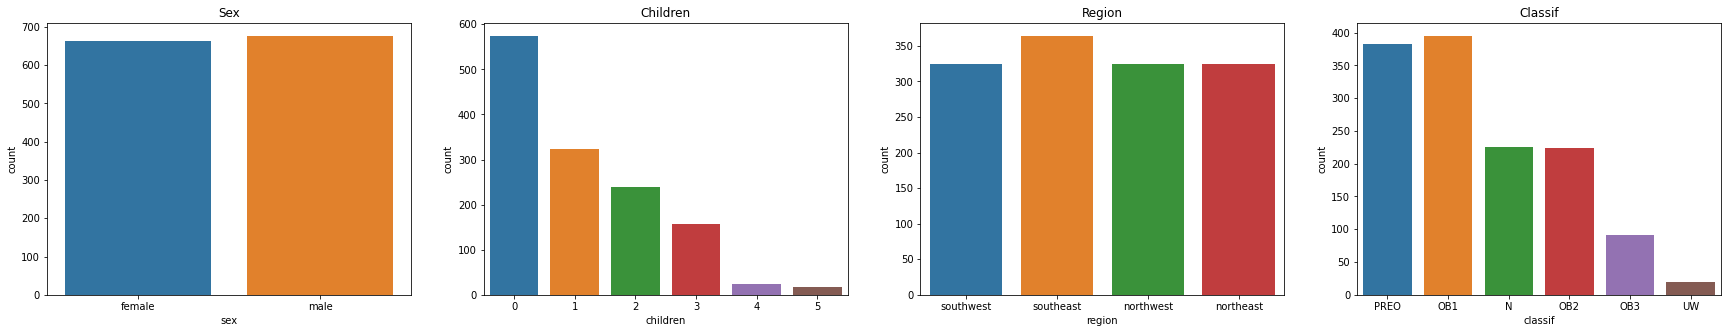

In [ ]:
plt.figure(figsize=(30,5))
plt.subplot(141)
sb.countplot(data=df,x='sex')
plt.title("Sex")

plt.subplot(142)
sb.countplot(data=df,x='children')
plt.title("Children")

plt.subplot(143)
sb.countplot(data=df,x='region')
plt.title("Region")

plt.subplot(144)
sb.countplot(data=df,x='classif')
plt.title("Classif")
plt.show()

we can observe the sex graph 
* Male insurence policy members are slightly higher then the Female members 
**************************************************
 we can onserve the childrens graph
 * the policy members are having No or 0 childrens among the other policy members 
 ***********************************************
 we can see the Region graph 
 * In southeast policy holders are present  slightly higher in count among other regions 
 ************************************************
 we can see the Classif graph
 * the BMI  Classif of PREO AND OB1  policy holders are higher in count among other BMI classif

In [ ]:
df

,age,sex,bmi,classif,children,smoker,region,charges
0,19.000000,female,27.900,PREO,0,yes,southwest,16884.92400
1,18.000000,male,33.770,OB1,1,no,southeast,1725.55230
2,28.000000,male,33.000,OB1,3,no,southeast,4449.46200
3,39.133782,male,22.705,N,0,no,northwest,21984.47061
4,32.000000,male,28.880,PREO,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1333,50.000000,male,30.970,OB1,3,no,northwest,10600.54830
1334,18.000000,female,31.920,OB1,0,no,northeast,2205.98080
1335,18.000000,female,36.850,OB2,0,no,southeast,1629.83350
1336,21.000000,female,25.800,PREO,0,no,southwest,2007.94500


# **Distribution of sex and charges**

**Here we are installing the plotly for better visulizations**

In [ ]:
# pip install plotly

In [ ]:
import plotly.express as px

In [ ]:
px.histogram(df, x='charges', color='sex')

Above we can see the Charges graph with respect sex ratio
 
          * the Bin size is 0 - 200 each bin is 200
* Males are having the high charges then the females
*  we can see in the above graph each every bin the males are having the higher charages  then the females

# **Distribution of sex ratio  in all Features**

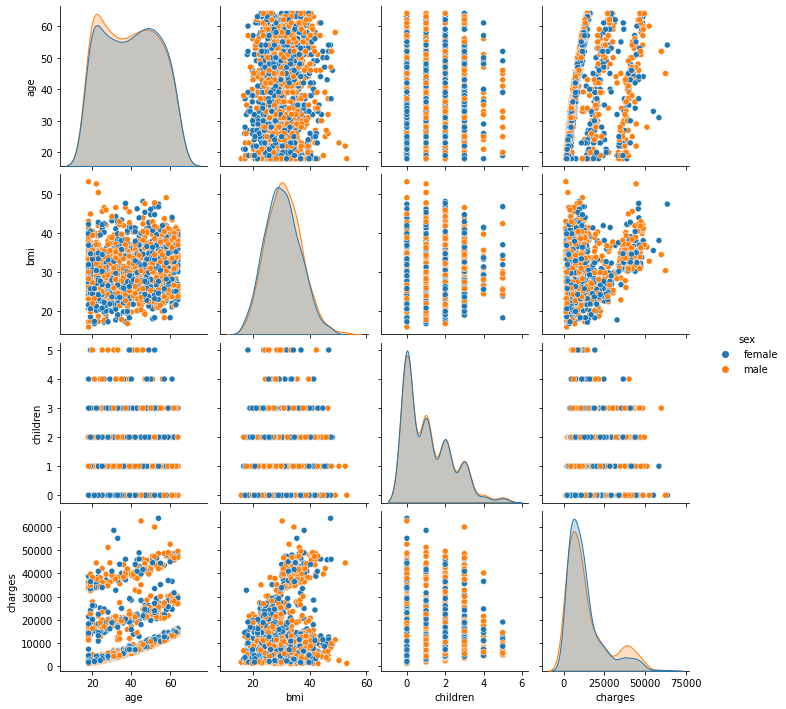

In [ ]:
sb.pairplot(df,hue='sex')

In the above pairplot we can see the sex ratio distribution of all the feature 
* we can see in  the charges Females are highly distributed then the males 
* we can see in the children feamles are higly distributed then the males 
* bmi is normally distributed and males are slighly distributed high
* we can see distribution of males Age 

# **Distribution of smoker in all features**

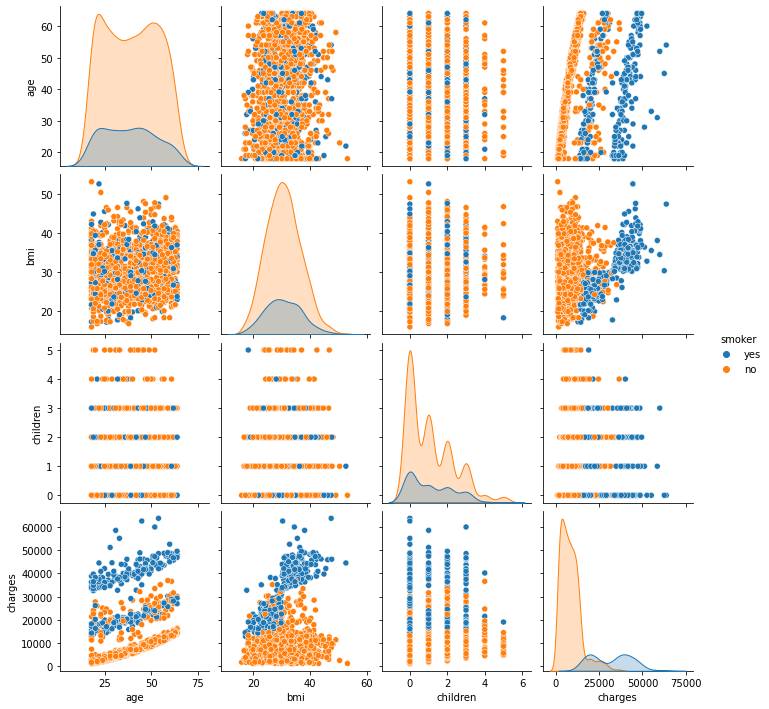

In [ ]:
sb.pairplot(df,hue='smoker')

we can see the above pairplot the distribution of  Male smoker in all features is highly distributed 
* **we can say from this graph the smoker is having the charges**

# **Distribution of charges** 

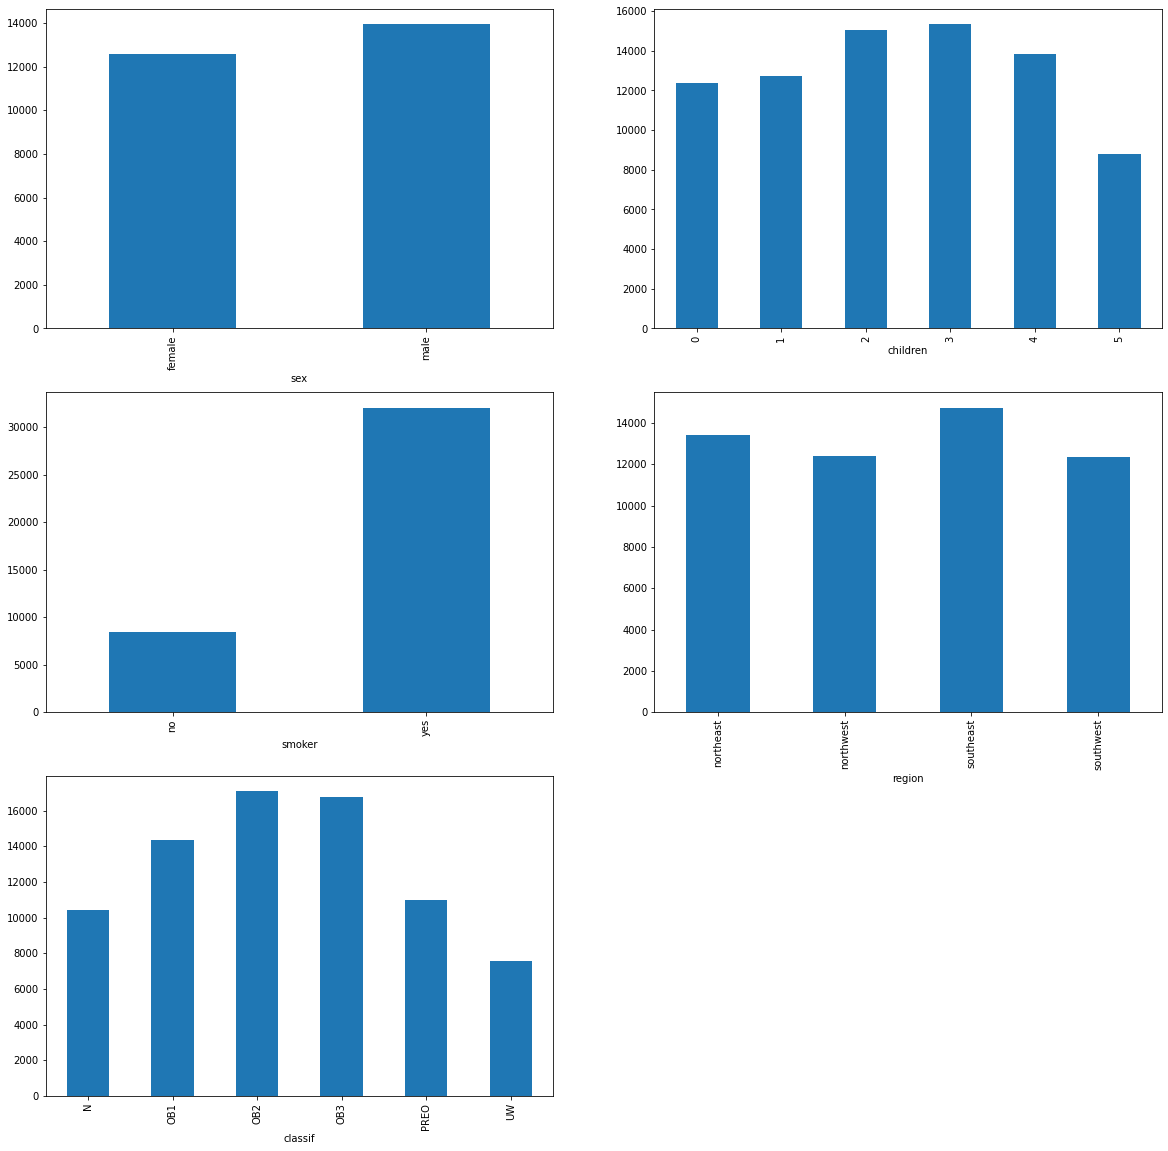

In [ ]:
cat_column2= ['sex', 'children', 'smoker', 'region','classif']
plt.subplots(figsize=(20, 20))
for i, col in enumerate(cat_column2):
    plt.subplot(3, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
plt.show()

we can see the above graph 
* we can see in the sex  ratio graph  males are having the higher charges then the Females 

* The policy holders of  childrens who are having the 2 and 3 havingh the high charges then the other policy holders childrens 

* we can see smoker graph male smokers are having the higher charges then the female smokers 

      * we can say smoker haveing the high charges 

* we can see in the region graph south east region having the high chargers then the other regions 

* we can see the above Bmi classif graph the classif of OB2,OB3 are having the high charges then the other  bmi classif  

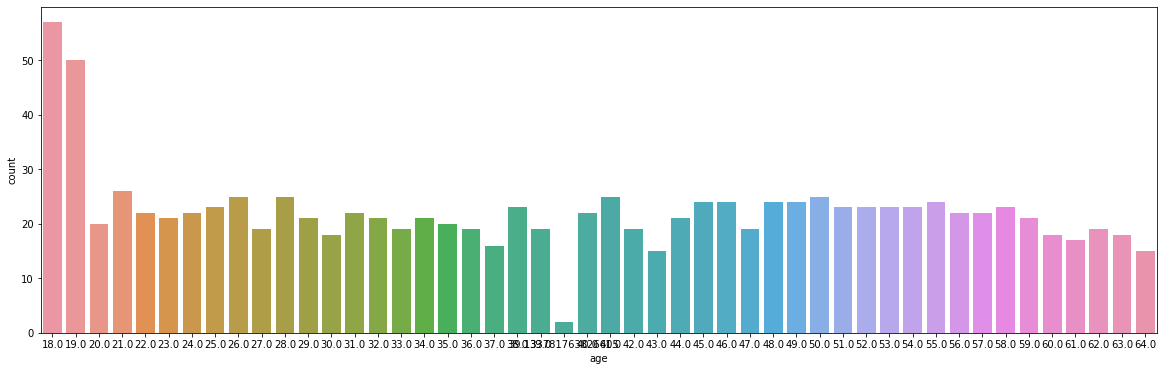

In [ ]:
#Non-Smokers on the basis of age
plt.figure(figsize=(20,6))
sb.countplot(x='age',data=df[(df.smoker=='no')])
plt.show()

**The Age- 18,19 are more in count of  Non smokers**

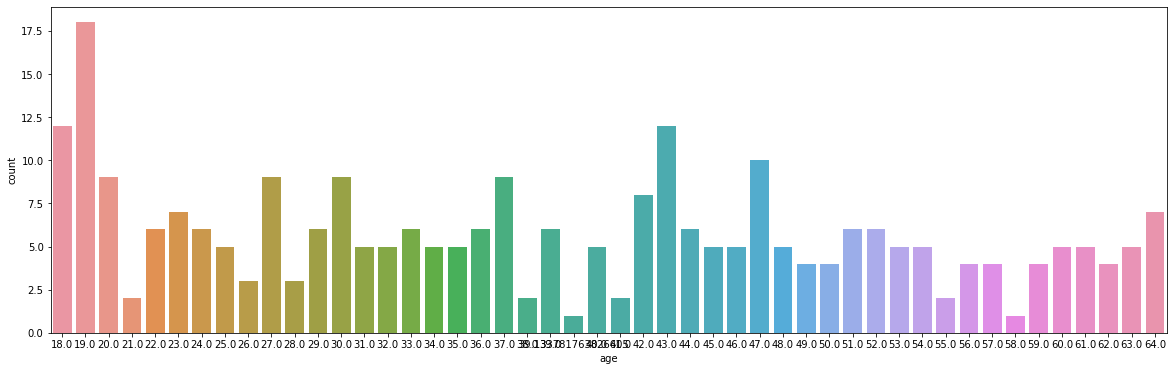

In [ ]:
#Smokers on the basis of age
plt.figure(figsize=(20,6))
sb.countplot(x='age',data=df[(df.smoker=='yes')])
plt.show()

**The Age- 19 are more in count of  smokers**

# **Analysis of Age and bmi with respect to the Charges & smoker**

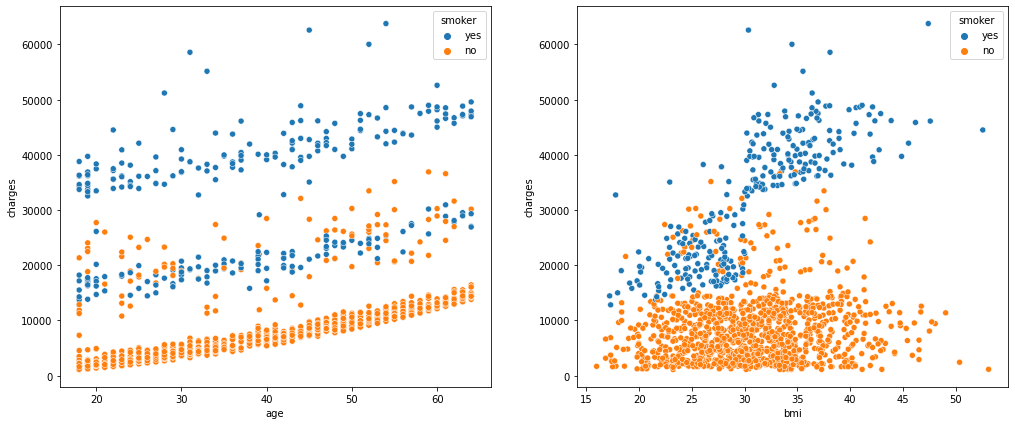

In [ ]:
cat_column3= ['age', 'bmi']  
plt.subplots(figsize=(17, 7))
for i, col in enumerate(cat_column3):
    plt.subplot(1, 2, i + 1)
    sb.scatterplot(data=df, x=col,y='charges',hue='smoker')
plt.show()

we cans ee the above grahs 
* **according to the age & smokers  the age is increasing and somkers are aslo increasing  and there some outliers**
***************
* **according to the bmi & smokers the bmi is increasing and smokers are also increasing both are positive correlation**

# **Distribution of age and bmi**

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



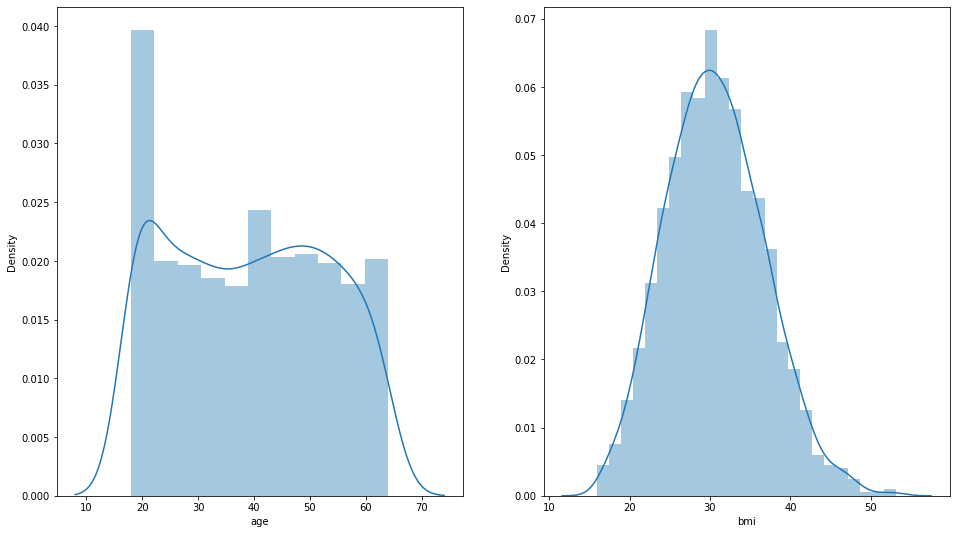

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(121)
sb.distplot(df['age'])
plt.subplot(122)
sb.distplot(df['bmi'])
plt.show()

we can see the above graphs agi and bmi  distribution
* In age distribution the age of 20 policy holders are higher 
* bmi is Normally  distributed 

**structure of the data**

In [ ]:
df.dtypes

age         float64
sex          object
bmi         float64
classif      object
children      int64
smoker       object
region       object
charges     float64
dtype: object

**there are some object type data we have to convert the data in to categorical data**

# **Feature Engineering  & Label Encodeing**

In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'classif', 'children', 'smoker', 'region',
       'charges'],
      dtype='object')

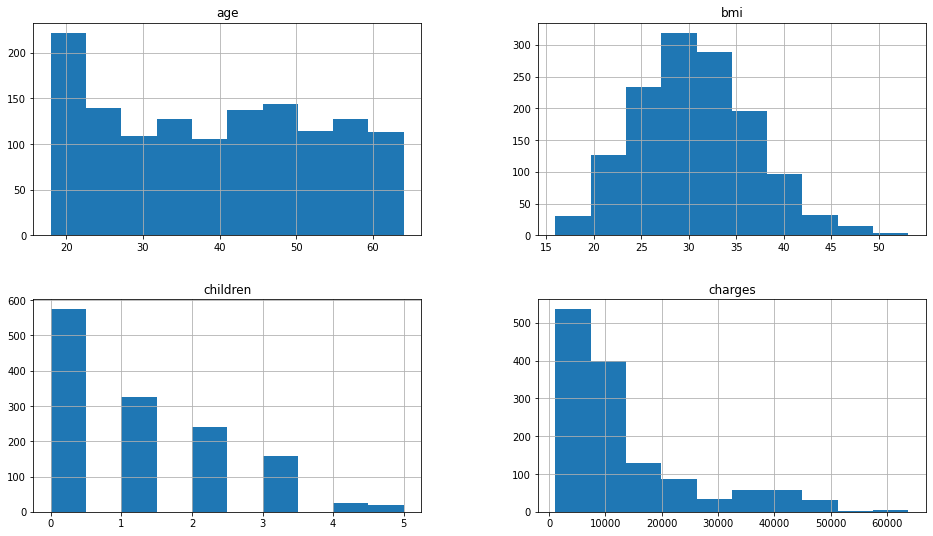

In [ ]:
df.hist(figsize=(16,9))
plt.show()

the data is not Normally distributed we can use the normalization scaling 


In [ ]:
df1=df.copy()

In [ ]:
from sklearn import preprocessing

In [ ]:
#Feature Engineering

df1.sex=df1.sex.astype('category')
df1.classif=df1.classif.astype('category')
df1.smoker=df1.smoker.astype('category')
df1.region=df1.region.astype('category')

# label encoding 
label_encoder = preprocessing.LabelEncoder()
df1['sex']=label_encoder.fit_transform(df1['sex'])
df1['classif']=label_encoder.fit_transform(df1['classif'])
df1['smoker']=label_encoder.fit_transform(df1['smoker'])
df1['region']=label_encoder.fit_transform(df1['region'])


# **Feature Scaling**

In [ ]:
df1

,age,sex,bmi,classif,children,smoker,region,charges
0,19.000000,0,27.900,4,0,1,3,16884.92400
1,18.000000,1,33.770,1,1,0,2,1725.55230
2,28.000000,1,33.000,1,3,0,2,4449.46200
3,39.133782,1,22.705,0,0,0,1,21984.47061
4,32.000000,1,28.880,4,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,50.000000,1,30.970,1,3,0,1,10600.54830
1334,18.000000,0,31.920,1,0,0,0,2205.98080
1335,18.000000,0,36.850,2,0,0,2,1629.83350
1336,21.000000,0,25.800,4,0,0,3,2007.94500


In [ ]:
#Feature Scaling
scaler = MinMaxScaler()
scaled_df = pd.DataFrame(scaler.fit_transform(df1.to_numpy()),columns=df1.columns)

In [ ]:
df1

,age,sex,bmi,classif,children,smoker,region,charges
0,19.000000,0,27.900,4,0,1,3,16884.92400
1,18.000000,1,33.770,1,1,0,2,1725.55230
2,28.000000,1,33.000,1,3,0,2,4449.46200
3,39.133782,1,22.705,0,0,0,1,21984.47061
4,32.000000,1,28.880,4,0,0,1,3866.85520
...,...,...,...,...,...,...,...,...
1333,50.000000,1,30.970,1,3,0,1,10600.54830
1334,18.000000,0,31.920,1,0,0,0,2205.98080
1335,18.000000,0,36.850,2,0,0,2,1629.83350
1336,21.000000,0,25.800,4,0,0,3,2007.94500


In [ ]:
corr = df1.corr()

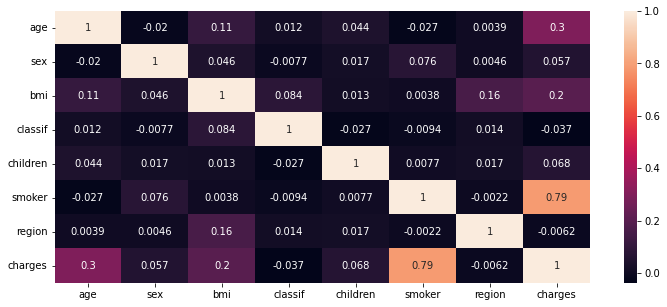

In [ ]:
plt.figure(figsize=(12,5))
sb.heatmap(corr,annot=True)
plt.show()

In [ ]:
rank=pd.DataFrame(corr['charges']).reset_index()
rank.sort_values(by='charges',ascending=False,inplace=True)
rank

,index,charges
7,charges,1.000000
5,smoker,0.787251
0,age,0.298319
2,bmi,0.198341
4,children,0.067998
1,sex,0.057292
6,region,-0.006208
3,classif,-0.036921


Conclusion:

here Target varible is Charges
* charges have high correaltion with smokers(0.78)
* charges have correaltion with age(0.3)
* charges have correaltion with bmi(0.2)

# **Splitting the  data into 70: 30 ratio**
* 70% is training data
* 30% is testing data 

In [ ]:
# y=mx+c
# here is X is the independent features 
# y is the dependent features
x,y=scaled_df.iloc[:,:-1],scaled_df.iloc[:,-1]

In [ ]:
#Splitting the data:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=30)
x_train.shape,y_train.shape

((936, 7), (936,))

In [ ]:
print(x_test.shape,y_test.shape)

(402, 7) (402,)


# **Model Building for Regression**

**The choosen models are :**
*  1)Linear Regression 
* 2)Decisontree
* 3)Randomforest
* 4)Adaboost
* 5)Stacking

**Linear Regression Model**

Linear Regression with **smoker vs charges**

In [ ]:

x1,y1 = scaled_df[['smoker']],scaled_df['charges']

In [ ]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=30)
x_train1.shape,y_train1.shape

((936, 1), (936,))

In [ ]:
# y=mx+c
model_LR_1 = LinearRegression().fit(x_train1,y_train1)
print("Intercept :", model_LR_1.intercept_)
print("Slope :", model_LR_1.coef_)  

Intercept : 0.1153481095450306
Slope : [0.37226068]


y=mx+c
x=independent varible

y=dependent varible
* m= slope
* c=Intercept 

In [ ]:
y_pred1 = model_LR_1.predict(x_test1)
print('predicted value:', y_pred1)

predicted value: [0.48760879 0.11534811 0.11534811 0.48760879 0.11534811 0.11534811
 0.11534811 0.11534811 0.48760879 0.11534811 0.11534811 0.11534811
 0.48760879 0.11534811 0.11534811 0.48760879 0.11534811 0.11534811
 0.48760879 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811
 0.48760879 0.48760879 0.11534811 0.11534811 0.11534811 0.11534811
 0.11534811 0.48760879 0.11534811 0.11534811 0.11534811 0.11534811
 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811 0.48760879
 0.11534811 0.11534811 0.11534811 0.48760879 0.11534811 0.11534811
 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811
 0.11534811 0.11534811 0.48760879 0.11534811 0.11534811 0.11534811
 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811
 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811
 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811 0.11534811
 0.48760879 0.11534811 0.11534811 0.11534811 0.11534811 0.48760879
 0.11534811 0.11534811 0.11534811 0.11534811 

In [ ]:
#R2 val
r2 = model_LR_1.score(x_train1,y_train1)
print('r2 of the model ===>',round(r2,2)*100)

r2 of the model ===> 61.0


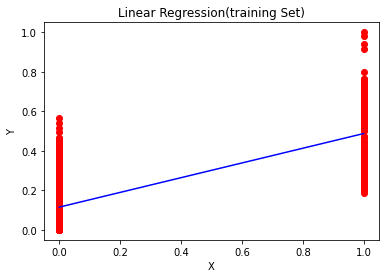

In [ ]:
#visualisation for training set
plt.scatter(x_train1,y_train1,color="red")
plt.plot(x_train1,model_LR_1 .predict(x_train1),color="blue")
plt.title('Linear Regression(training Set)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
MSE1=mean_squared_error(y_test1, y_pred1)
MAE1=mean_absolute_error(y_test1,y_pred1)
RMSE1 = mean_squared_error(y_test1, y_pred1, squared=False)
print("Mean square Error(age vs charges)     :",MSE1)
print("Mean Absolute Error(age vs charges)   :",MAE1)
print("Root Mean square Error(age vs charges):",RMSE1)

Mean square Error(age vs charges)     : 0.012967133844326266
Mean Absolute Error(age vs charges)   : 0.08627107465391169
Root Mean square Error(age vs charges): 0.11387332367295804


# **Multi-linear regression with selected features**

Independent var : bmi,smoker,region,classif,age

In [ ]:
x2,y2 = scaled_df[['bmi', 'smoker','region','classif','age']],scaled_df['charges']

In [ ]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x2,y2,test_size=0.3,random_state=30)
x_train2.shape,y_train2.shape

((936, 5), (936,))

In [ ]:
#Modelling
model_LR_2 = LinearRegression().fit(x_train2,y_train2)
print("Intercept :", model_LR_2.intercept_)# c-->y-intercept
print("Slope :", model_LR_2.coef_)  # m -->slope

Intercept : -0.03326241279593367
Slope : [ 0.19540523  0.37720737 -0.0117632  -0.03433489  0.19931321]


In [ ]:
#R2 val
r_2 = model_LR_2.score(x_train2,y_train2)
print(round(r_2,2)*100)

75.0


In [ ]:
y_pred2=model_LR_2.predict(x_test2)
print('predicted value:', y_pred2)

predicted value: [ 0.56163115  0.0812713   0.05972945  0.40330647  0.19759049  0.10017537
  0.07486248  0.12344401  0.52655659  0.16293949  0.09466384  0.15781354
  0.55437335  0.18684702  0.00519331  0.57237323  0.18409693  0.10811011
  0.44508082  0.17333063  0.00210919  0.12849423  0.12235275  0.17044985
  0.49799583  0.60527143  0.20944591  0.06453095  0.15961074  0.21818556
  0.02760688  0.46883278  0.03335     0.22108995  0.17751457  0.12220748
  0.0034018   0.08510926 -0.00987692  0.12762726  0.06152096  0.53055582
  0.02353747  0.23257132  0.15059032  0.47186921  0.05702617  0.0473917
  0.01828004  0.0750888   0.15337015  0.18728164  0.16582178  0.00112408
  0.15203146  0.11035701  0.48088282  0.08984592  0.193168    0.04435127
  0.22698054  0.16569789  0.13792723  0.12278799 -0.00238587  0.1173854
  0.13635466  0.01074887  0.01212929  0.23042206  0.17422026  0.01535737
 -0.00460713  0.12085887  0.2400589  -0.05010382  0.18324207  0.12868771
  0.49338182  0.05382404 -0.00629338

In [ ]:
MSE2=mean_squared_error(y_test2, y_pred2)
MAE2=mean_absolute_error(y_test2,y_pred2)
RMSE2 = mean_squared_error(y_test2, y_pred2, squared=False)
print("Mean square Error(age vs charges)     :",MSE2)
print("Mean Absolute Error(age vs charges)   :",MAE2)
print("Root Mean square Error(age vs charges):",RMSE2)

Mean square Error(age vs charges)     : 0.008775965476476006
Mean Absolute Error(age vs charges)   : 0.0648402809850076
Root Mean square Error(age vs charges): 0.09368012316642206


# **Multi-Linear Regression: with all features**

In [ ]:
#Model : Multi Linear regression
model_LR = LinearRegression().fit(x_train,y_train)
print("Intercept :", model_LR.intercept_)# c-->y-intercept
print("Slope :", model_LR.coef_)  # m -->slope

Intercept : -0.038350987054377395
Slope : [ 0.19785847 -0.00224163  0.1944595  -0.03364137  0.03281112  0.37691927
 -0.01216404]


In [ ]:

coeff_det=model_LR.score(x_train,y_train)
round(coeff_det,2)*100

75.0

In [ ]:
y_pred3=model_LR.predict(x_test)
print('predicted value:', y_pred3)

predicted value: [ 0.55928602  0.07946884  0.05829438  0.41057066  0.18853391  0.10081758
  0.0672199   0.12840816  0.52652354  0.15449216  0.09299577  0.14887597
  0.54533338  0.17802084 -0.00190114  0.56509572  0.17529021  0.11975332
  0.45168956  0.16672284 -0.00513358  0.13327735  0.11570166  0.16414602
  0.49583864  0.61091201  0.22254413  0.05655697  0.16428481  0.22485316
  0.02855876  0.47337045  0.02564413  0.22086543  0.16868086  0.13343066
 -0.00194273  0.08380327 -0.01706168  0.12118396  0.08682651  0.54358975
  0.01627966  0.22363382  0.15083486  0.46363234  0.0626668   0.03947142
  0.01746796  0.08266313  0.16644631  0.19159461  0.15929695 -0.00614588
  0.15867866  0.12174137  0.47936211  0.08154213  0.1847163   0.05234815
  0.21784457  0.15717092  0.15162514  0.1145904  -0.01002876  0.11566621
  0.13708833  0.01147716  0.01133525  0.22114265  0.16495931  0.01043405
 -0.00599288  0.12826172  0.25041338 -0.04805328  0.1875959   0.12947979
  0.497909    0.0478871  -0.011090

In [ ]:
MSE3=mean_squared_error(y_test, y_pred3)
MAE3=mean_absolute_error(y_test,y_pred3)
RMSE3 = mean_squared_error(y_test, y_pred3, squared=False)
print("Mean square Error(smoker vs charges)     :",MSE3)
print("Mean Absolute Error(smoker vs charges)   :",MAE3)
print("Root Mean square Error(smoker vs charges):",RMSE3)

Mean square Error(smoker vs charges)     : 0.008659264314033684
Mean Absolute Error(smoker vs charges)   : 0.06373259160080452
Root Mean square Error(smoker vs charges): 0.09305516812103283


# **Grid search view**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Hyperparameter tuning
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
params = {'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}

In [ ]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
 param_grid=params,
 cv = 4,
 n_jobs=-1, verbose=1, scoring="r2")

In [ ]:
%%time
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 3.22 s, sys: 257 ms, total: 3.48 s
Wall time: 1min 28s


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='r2', verbose=1)

In [ ]:
grid_search.best_score_

0.8622731031839912

In [ ]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

# **Cross Validation:**

**cross validation : Linear Model with all features**

In [ ]:
kfolds = KFold(n_splits=10,shuffle=True,random_state=7)
score1 = cross_val_score(model_LR,x,y,scoring='r2',cv=kfolds)
print(round(score1.mean(),2)*100)

75.0


# **Decision Tree Regression**

In [ ]:
#Modelling :(Decision Tree regressor):
dtm = DecisionTreeRegressor(max_depth=5,min_samples_split=5,max_leaf_nodes=10)
dtm.fit(x_train,y_train)
print("R-Squared on train dataset :",round(dtm.score(x_train,y_train),2)*100)
dtm.fit(x_test,y_test) 
print("R-Squaredon test dataset: ",round(dtm.score(x_test,y_test),2)*100)

R-Squared on train dataset : 87.0
R-Squaredon test dataset:  86.0


# **Cross Validation**
**cross valalidation  : Decisiontreeregressor**

In [ ]:
score1 = cross_val_score(dtm,x,y,scoring='r2',cv=kfolds)
print(round(score1.mean(),2)*100)

85.0


# **Random forest model**

In [ ]:
model_RF = RandomForestRegressor(max_depth=5,min_samples_leaf=5,n_jobs=-1,random_state=42)
model_RF.fit(x_train,y_train)


RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_jobs=-1,
                      random_state=42)

In [ ]:
#Evaluate the model
RF_score = cross_val_score(model_RF,x,y,scoring='r2',cv=kfolds,n_jobs=-1,error_score='raise')
print(RF_score)
print('****************************')
print("r2 value :",round(RF_score.mean(),2)*100)

[0.83303104 0.88431791 0.84591603 0.88142503 0.87997738 0.82971117
 0.90540682 0.84478434 0.81668938 0.88860527]
****************************
r2 value : 86.0


# **Conclusion**

In [ ]:
final_df = pd.DataFrame()

In [ ]:
final_df['Models']=['LR','DT','RFM']
final_df['C_V_Score']=['0.75','0.85','0.86']

**Evaluation scores of all algorithms**

In [ ]:
final_df 

,Models,C_V_Score
0,LR,0.75
1,DT,0.85
2,RFM,0.86


* LR:- **Linear Regression model**

* DT:- **Decission Tree regression model**

* RFM:- **Random Forest Model**

**Final Conclusion:**

**Here,by observing the cross validation score we can conclude that "Random Forest Model" would be the best model to predict the data the insurance policy**